In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2021-08-19T17:00:00,15,Campania,340,23,363,8956,9319,139,647,...,4.0,14412.0,3314.0,132.0,6.34,3.90,4.49,19.52,15.00,1.51
542,2021-08-20T17:00:00,15,Campania,348,22,370,9068,9438,119,539,...,7.0,13080.0,2265.0,112.0,5.95,3.92,4.12,23.80,-4.35,1.28
543,2021-08-21T17:00:00,15,Campania,344,22,366,9115,9481,43,585,...,2.0,16295.0,3214.0,47.0,6.01,3.86,3.59,18.20,0.00,0.46
544,2021-08-22T17:00:00,15,Campania,337,22,359,9175,9534,53,470,...,1.0,5418.0,2864.0,60.0,6.13,3.77,8.67,16.41,0.00,0.56


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 23, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 190
Nuovi tamponi: 14671.0
Percentuale nuovi positivi/nuovi tamponi: 1.3 %
Nuovi guariti: 351.0
Nuovi deceduti: 3.0
Variazione positivi ricoverati con sintomi: 24.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: -189.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 8, 23, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-06-24T17:00:00,15,Campania,252,20,272,9304,9576,-174,112,...,7.0,14159.0,1421.0,-161.0,7.35,2.84,0.79,7.88,-9.09,-1.78
1,2021-06-25T17:00:00,15,Campania,240,20,260,9121,9381,-195,77,...,8.0,12620.0,1494.0,-183.0,7.69,2.77,0.61,5.15,0.00,-2.04
2,2021-06-26T17:00:00,15,Campania,236,22,258,8898,9156,-225,127,...,20.0,14108.0,2104.0,-223.0,8.53,2.82,0.90,6.04,10.00,-2.40
3,2021-06-27T17:00:00,15,Campania,220,23,243,8758,9001,-155,95,...,5.0,11797.0,1451.0,-140.0,9.47,2.70,0.81,6.55,4.55,-1.69
4,2021-06-28T17:00:00,15,Campania,216,23,239,8345,8584,-417,48,...,17.0,3279.0,746.0,-413.0,9.62,2.78,1.46,6.43,0.00,-4.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-08-19T17:00:00,15,Campania,340,23,363,8956,9319,139,647,...,4.0,14412.0,3314.0,132.0,6.34,3.90,4.49,19.52,15.00,1.51
57,2021-08-20T17:00:00,15,Campania,348,22,370,9068,9438,119,539,...,7.0,13080.0,2265.0,112.0,5.95,3.92,4.12,23.80,-4.35,1.28
58,2021-08-21T17:00:00,15,Campania,344,22,366,9115,9481,43,585,...,2.0,16295.0,3214.0,47.0,6.01,3.86,3.59,18.20,0.00,0.46
59,2021-08-22T17:00:00,15,Campania,337,22,359,9175,9534,53,470,...,1.0,5418.0,2864.0,60.0,6.13,3.77,8.67,16.41,0.00,0.56


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

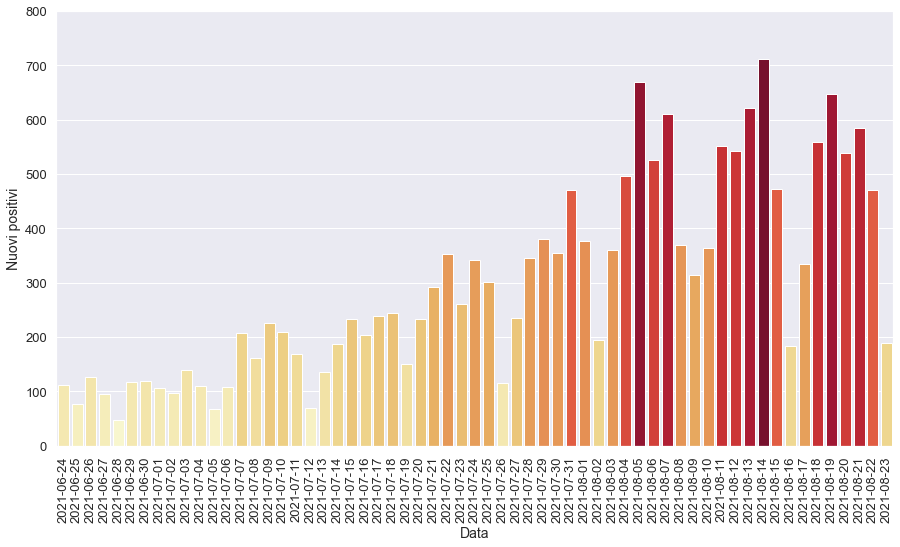

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

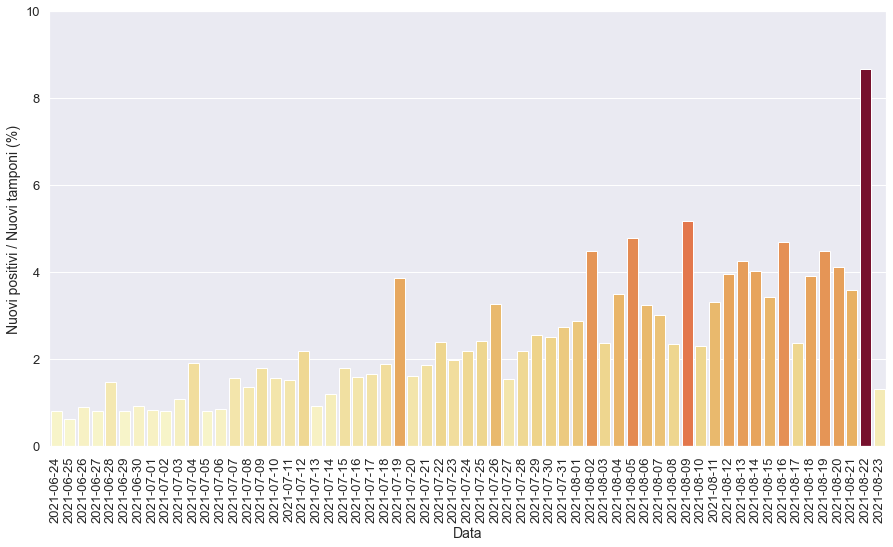

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

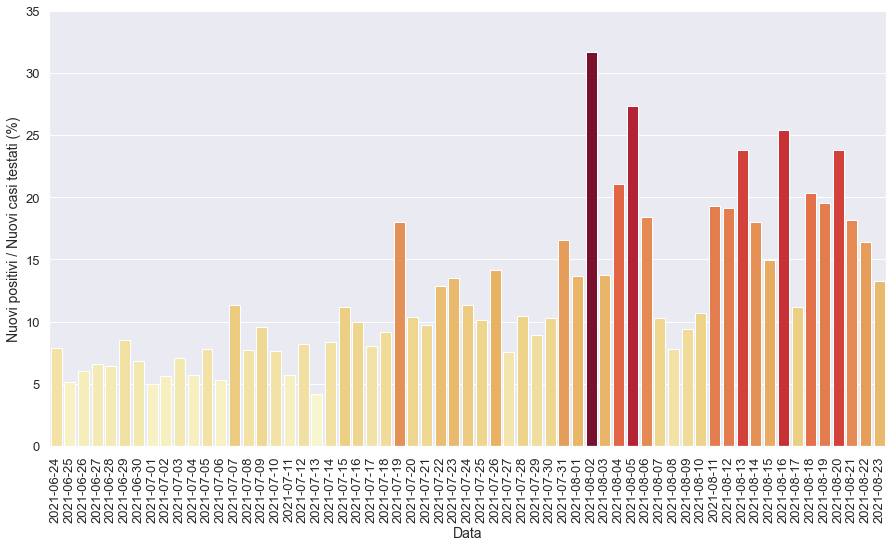

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

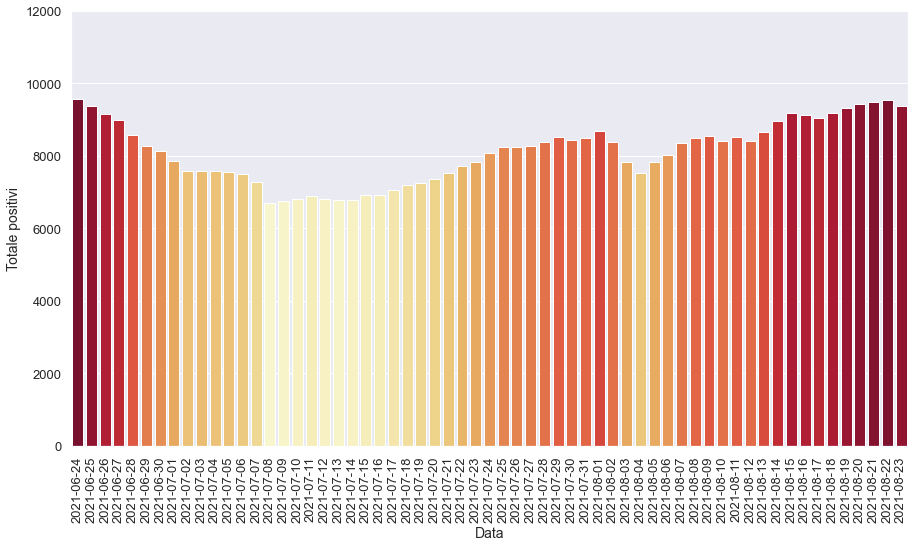

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

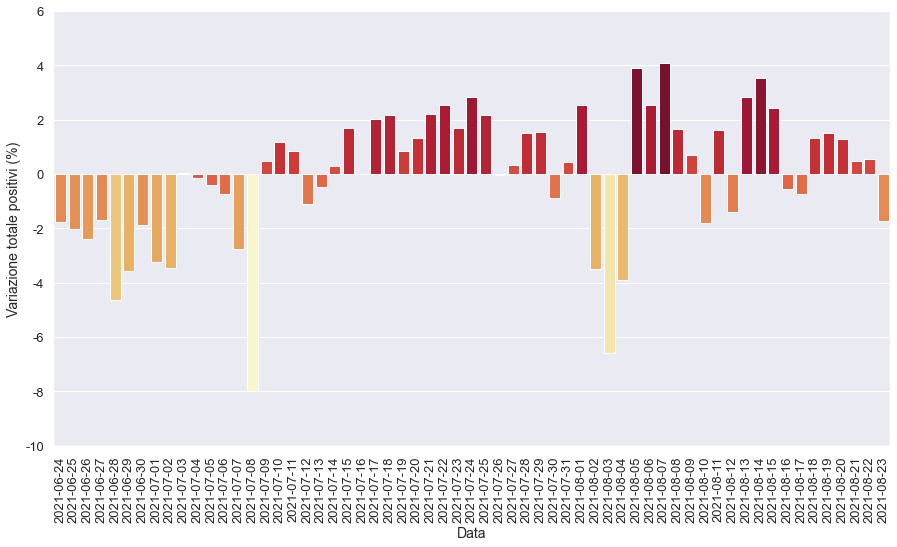

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

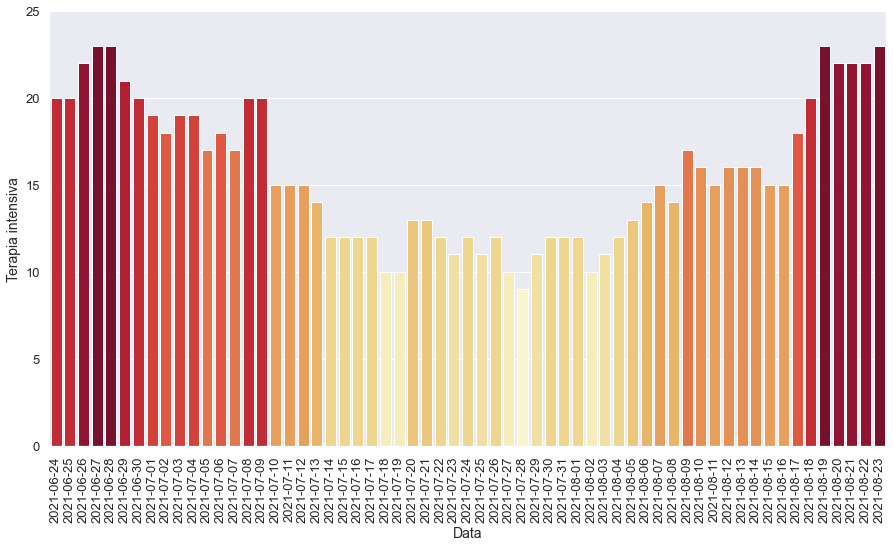

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

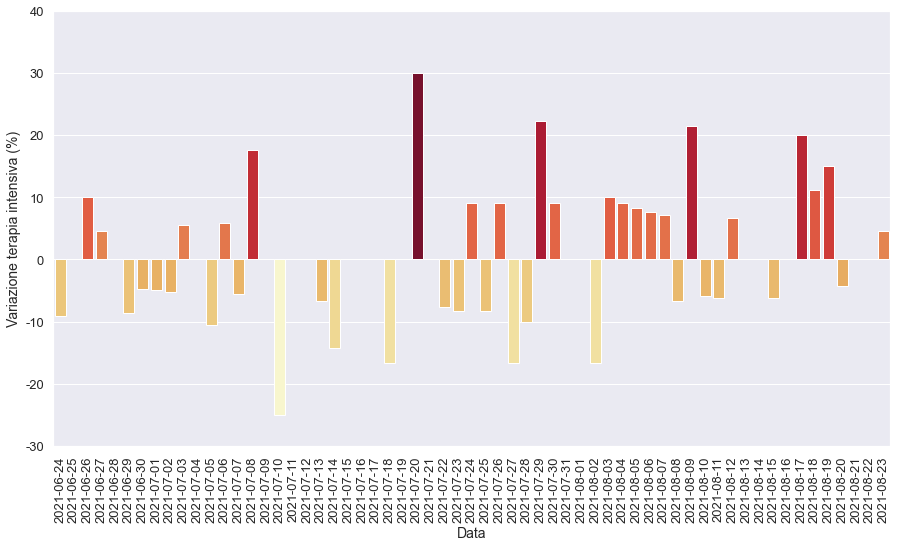

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

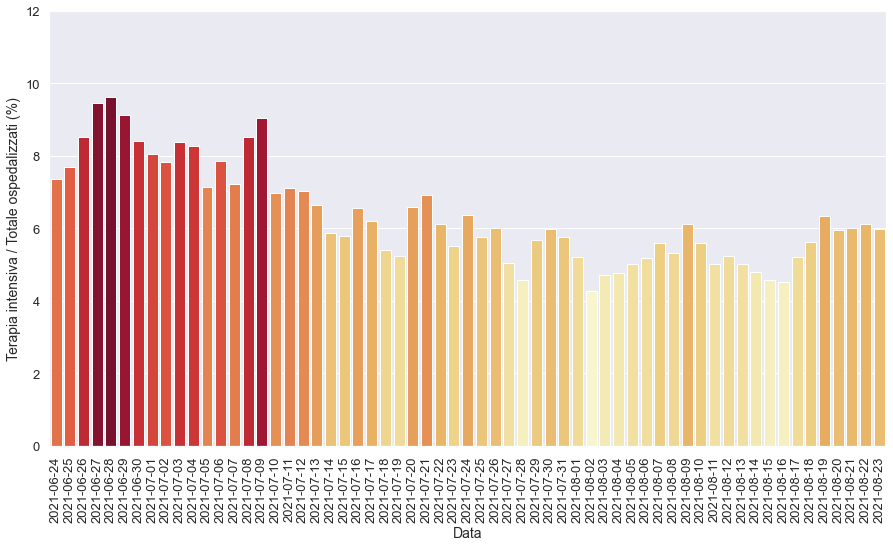

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

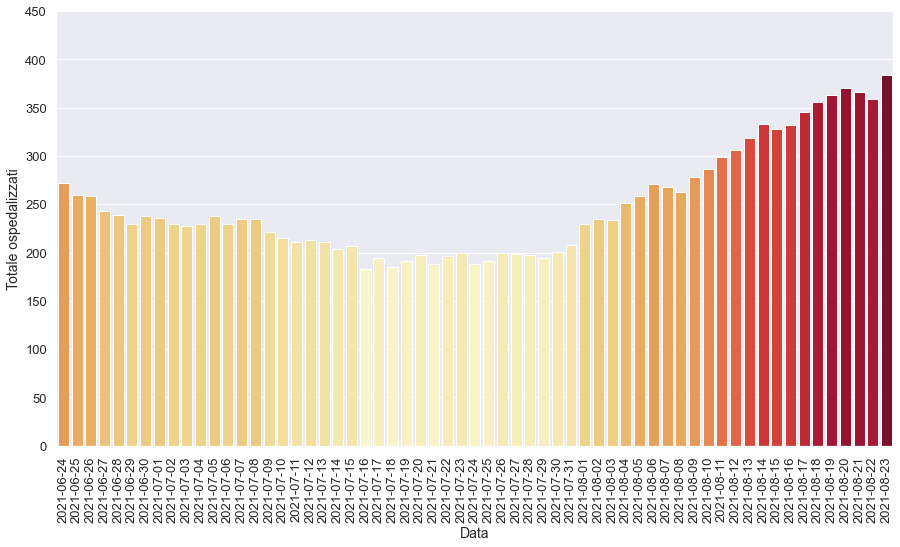

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

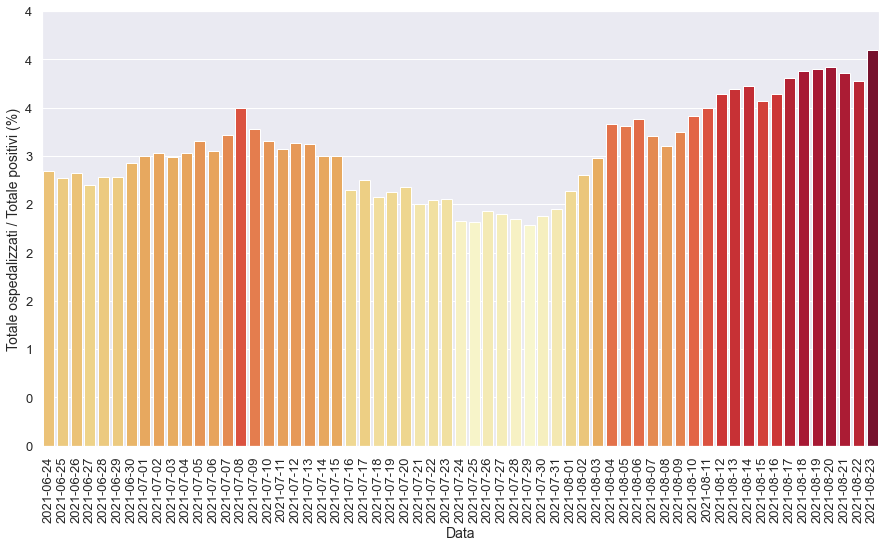

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

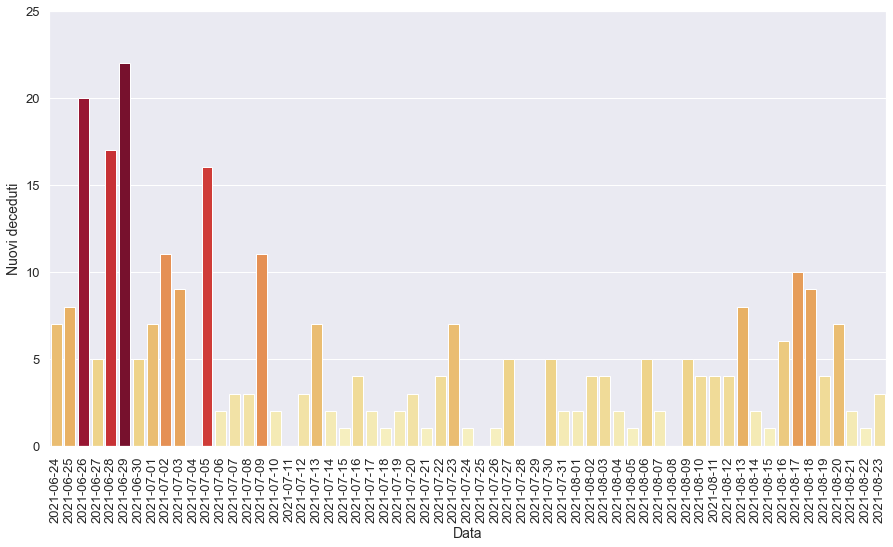

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

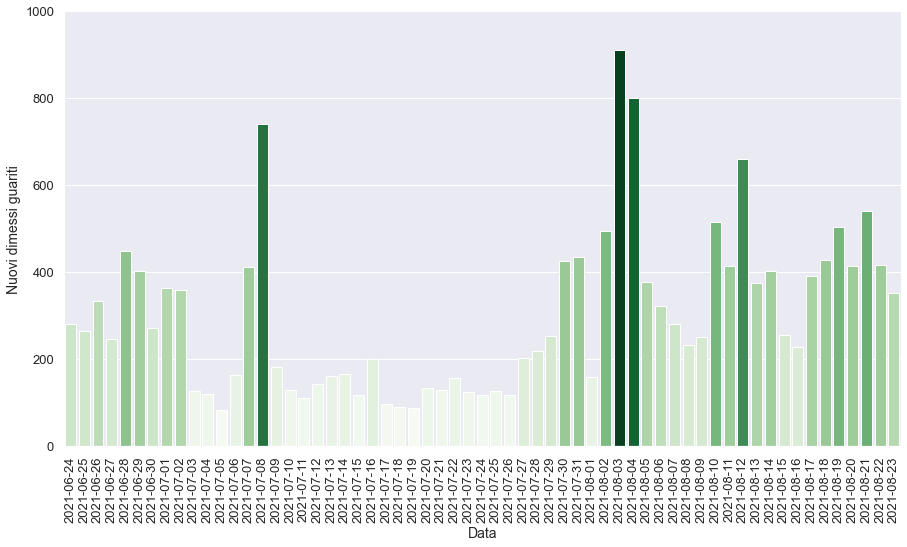

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-07-24T17:00:00,15,Campania,176,12,188,7879,8067,223,341,...,1.0,15647.0,3004.0,235.0,6.38,2.33,2.18,11.35,9.09,2.84
1,2021-07-25T17:00:00,15,Campania,180,11,191,8050,8241,174,301,...,0.0,12439.0,2964.0,171.0,5.76,2.32,2.42,10.16,-8.33,2.16
2,2021-07-26T17:00:00,15,Campania,188,12,200,8038,8238,-3,115,...,1.0,3517.0,813.0,-12.0,6.00,2.43,3.27,14.15,9.09,-0.04
3,2021-07-27T17:00:00,15,Campania,188,10,198,8068,8266,28,236,...,5.0,15286.0,3124.0,30.0,5.05,2.40,1.54,7.55,-16.67,0.34
4,2021-07-28T17:00:00,15,Campania,188,9,197,8195,8392,126,345,...,0.0,15802.0,3304.0,127.0,4.57,2.35,2.18,10.44,-10.00,1.52
5,2021-07-29T17:00:00,15,Campania,183,11,194,8326,8520,128,380,...,0.0,14978.0,4261.0,131.0,5.67,2.28,2.54,8.92,22.22,1.53
6,2021-07-30T17:00:00,15,Campania,189,12,201,8243,8444,-76,355,...,5.0,14133.0,3452.0,-83.0,5.97,2.38,2.51,10.28,9.09,-0.89
7,2021-07-31T17:00:00,15,Campania,196,12,208,8272,8480,36,471,...,2.0,17242.0,2847.0,29.0,5.77,2.45,2.73,16.54,0.00,0.43
8,2021-08-01T17:00:00,15,Campania,218,12,230,8466,8696,216,377,...,2.0,13165.0,2763.0,194.0,5.22,2.64,2.86,13.64,0.00,2.55
9,2021-08-02T17:00:00,15,Campania,225,10,235,8157,8392,-304,194,...,4.0,4326.0,612.0,-309.0,4.26,2.80,4.48,31.70,-16.67,-3.50


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

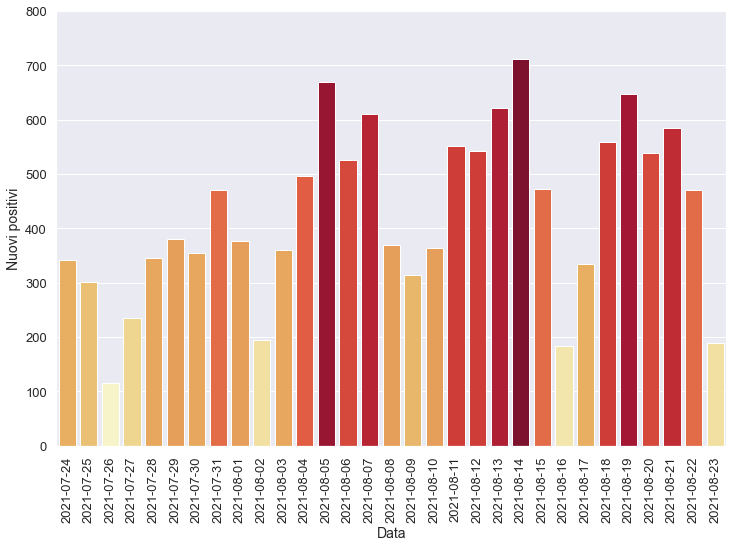

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

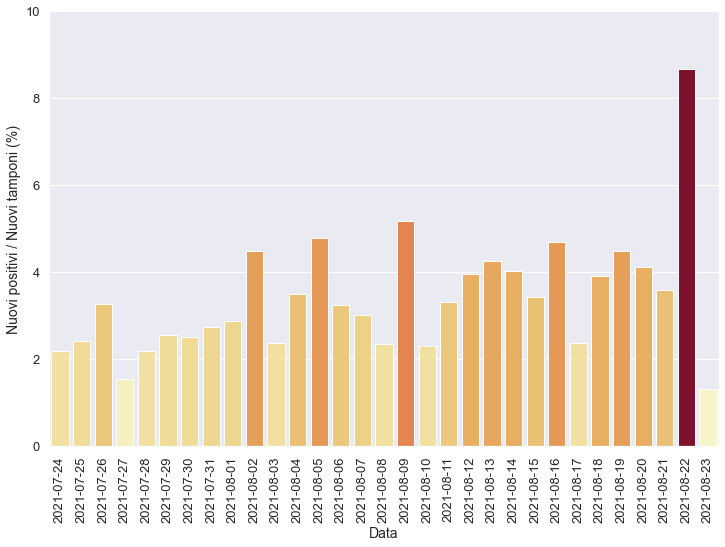

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

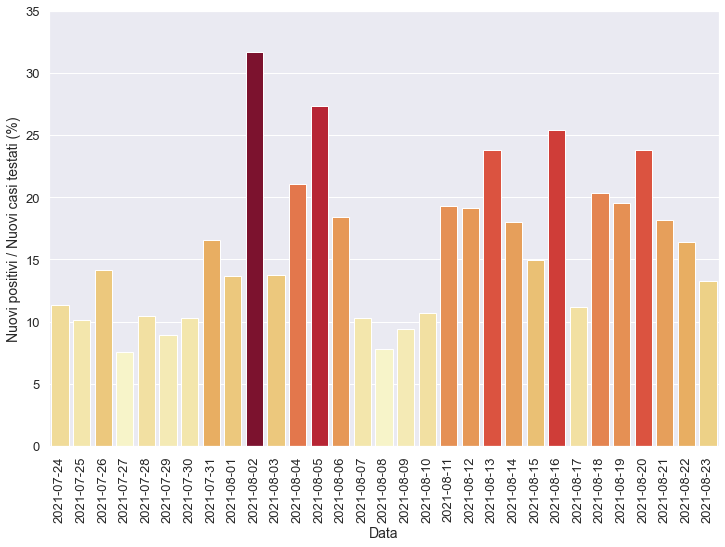

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

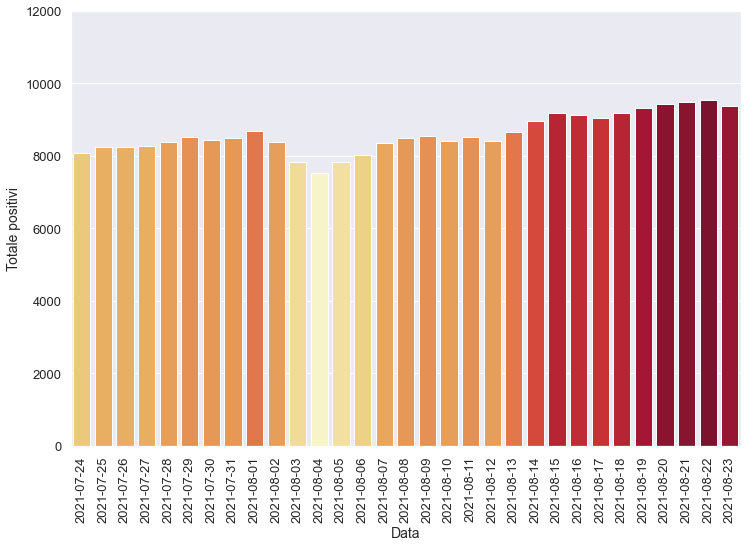

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

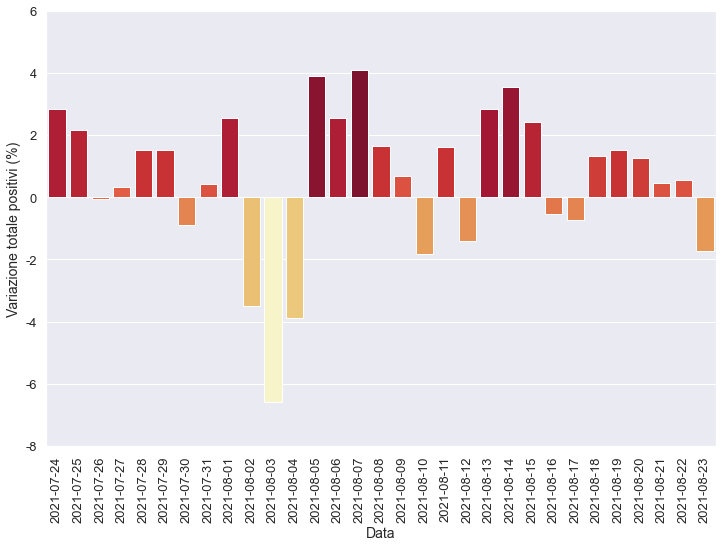

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

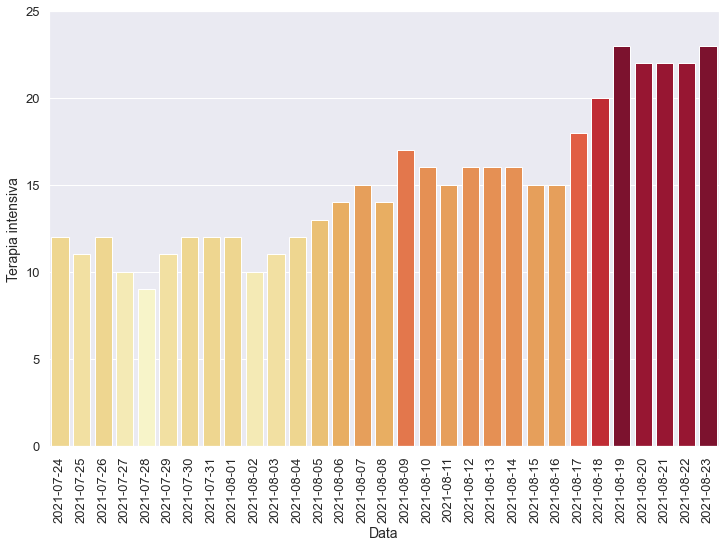

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

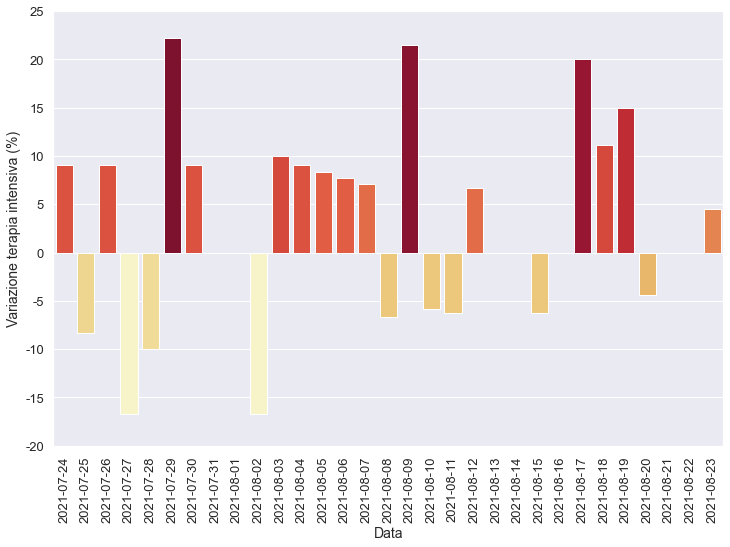

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

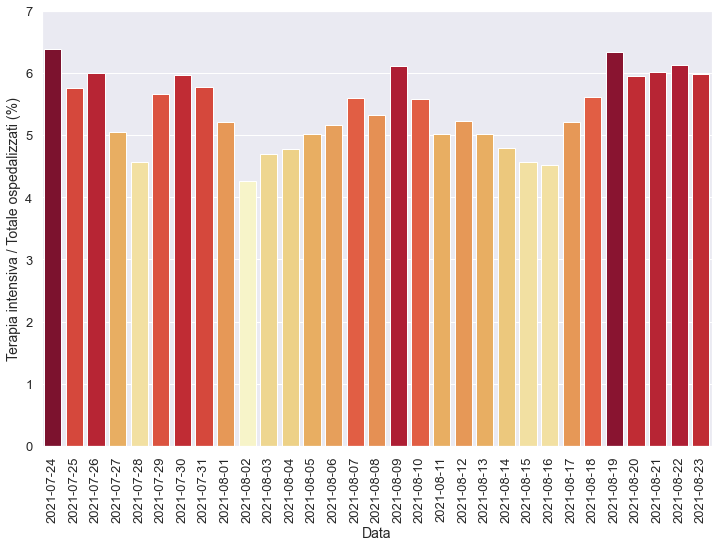

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

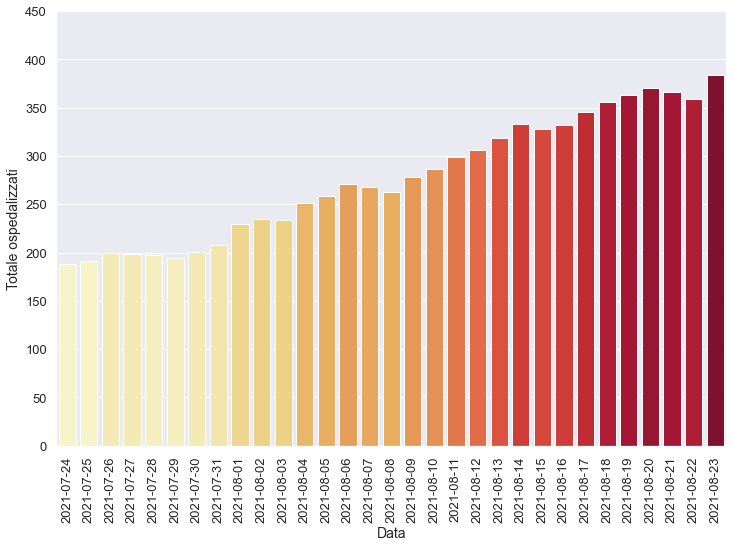

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

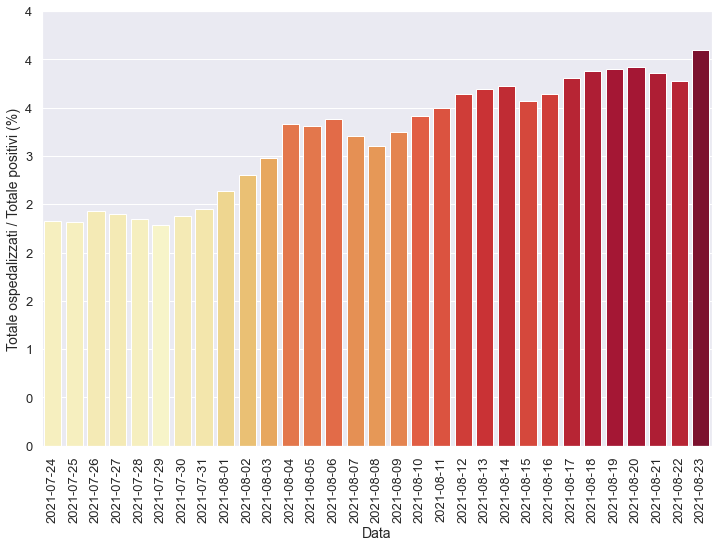

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

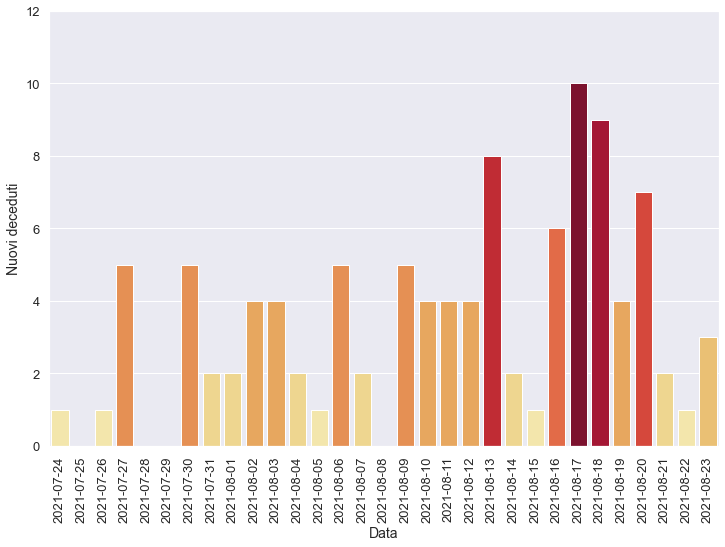

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

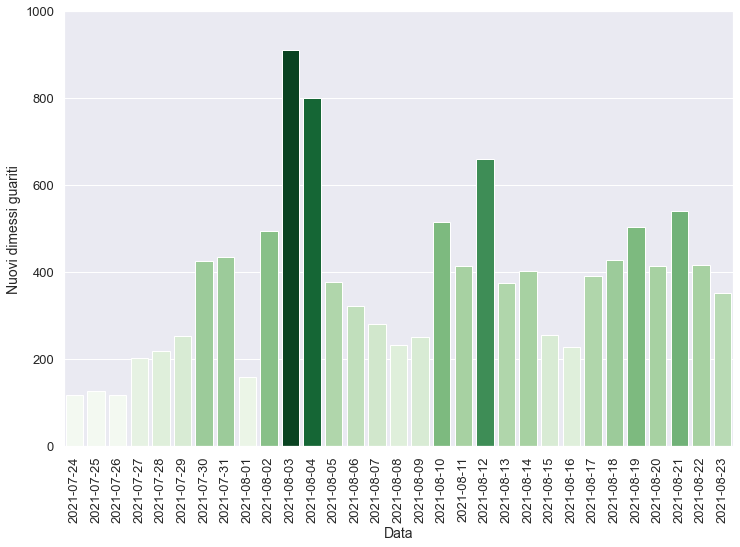

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-08-16T17:00:00,15,Campania,317,15,332,8793,9125,-50,183,...,6.0,3907.0,721.0,-54.0,4.52,3.64,4.68,25.38,0.00,-0.54
1,2021-08-17T17:00:00,15,Campania,327,18,345,8714,9059,-66,335,...,10.0,14129.0,3004.0,-79.0,5.22,3.81,2.37,11.15,20.00,-0.72
2,2021-08-18T17:00:00,15,Campania,336,20,356,8824,9180,121,558,...,9.0,14264.0,2739.0,110.0,5.62,3.88,3.91,20.37,11.11,1.34
3,2021-08-19T17:00:00,15,Campania,340,23,363,8956,9319,139,647,...,4.0,14412.0,3314.0,132.0,6.34,3.90,4.49,19.52,15.00,1.51
4,2021-08-20T17:00:00,15,Campania,348,22,370,9068,9438,119,539,...,7.0,13080.0,2265.0,112.0,5.95,3.92,4.12,23.80,-4.35,1.28
5,2021-08-21T17:00:00,15,Campania,344,22,366,9115,9481,43,585,...,2.0,16295.0,3214.0,47.0,6.01,3.86,3.59,18.20,0.00,0.46
6,2021-08-22T17:00:00,15,Campania,337,22,359,9175,9534,53,470,...,1.0,5418.0,2864.0,60.0,6.13,3.77,8.67,16.41,0.00,0.56
7,2021-08-23T17:00:00,15,Campania,361,23,384,8986,9370,-164,190,...,3.0,14671.0,1429.0,-189.0,5.99,4.10,1.30,13.30,4.55,-1.72


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

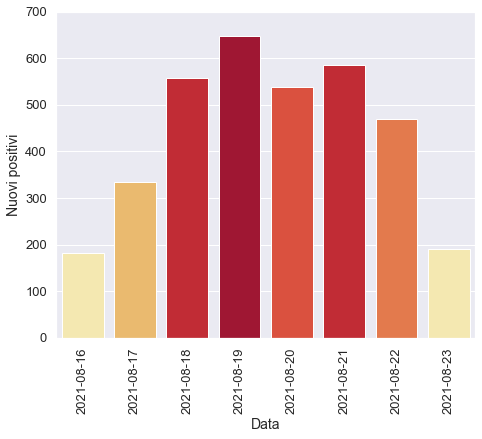

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

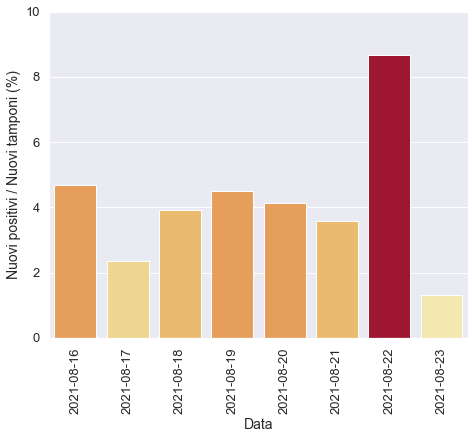

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

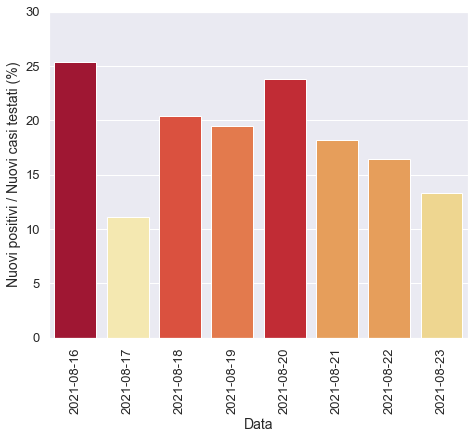

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

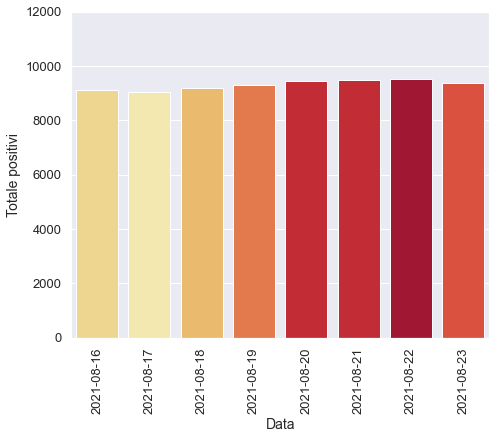

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

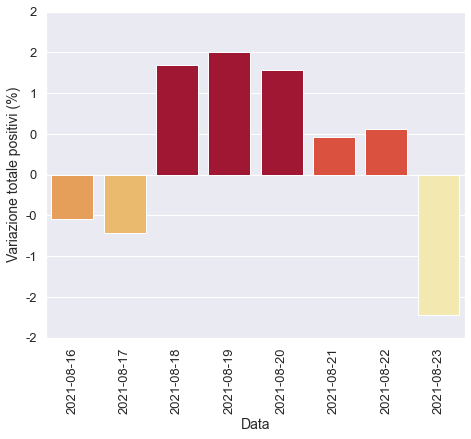

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

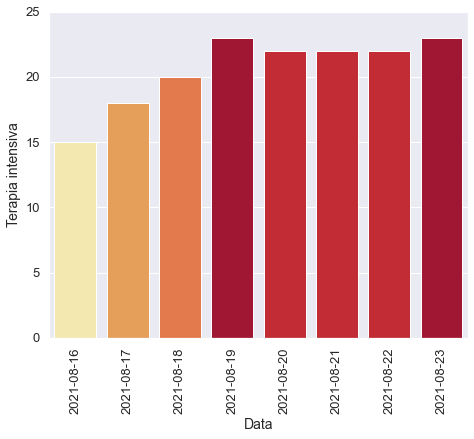

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

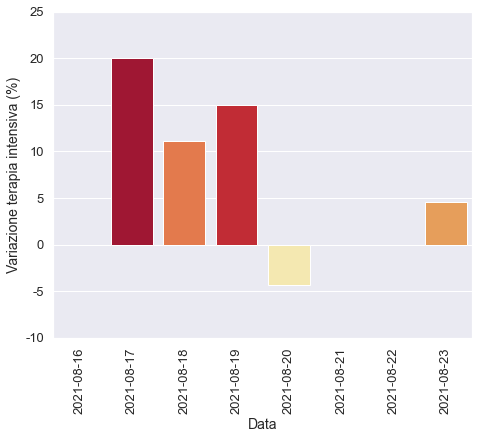

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

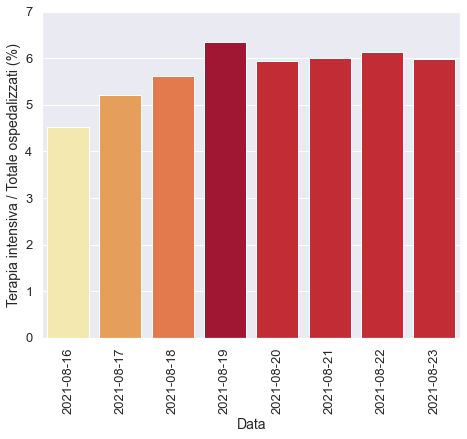

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

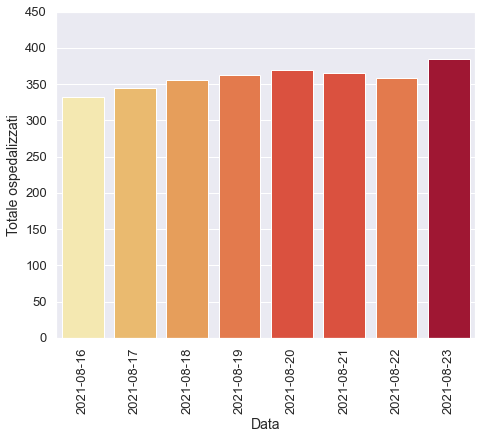

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

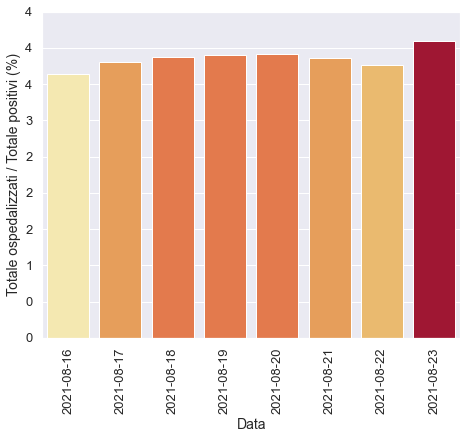

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

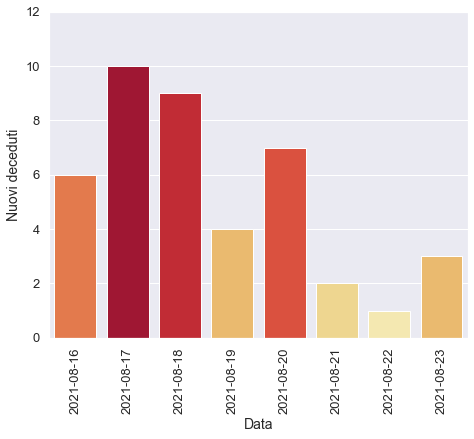

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

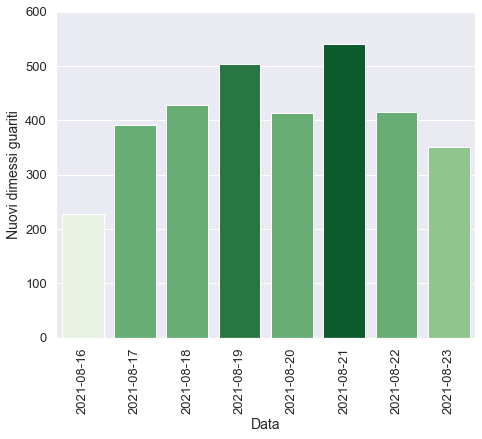

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)